# **Importing the Dependencies**

In [12]:
from typing import Literal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The workflow for the project includes the following steps:

**Data collection**<br/>
**Data analysis**<br/>
**Data preprocessing**<br/>
**Train-test split**<br/>
**Model training**<br/>
**Model evaluation**<br/>
**Prediction**<br/>

# **Data collection**

In [47]:
datas=pd.read_csv('/content/Medical_insurance.csv')

datas.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Analysis**

In [32]:
# Checking the number of rows and columns

datas.shape

(2772, 7)

In [33]:
# Getting some information about the dataset

datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [34]:
# checkinf for the count of missing values
datas.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [35]:
# Describing the dataset
datas.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-48-249faa6d8a76>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas['age'])


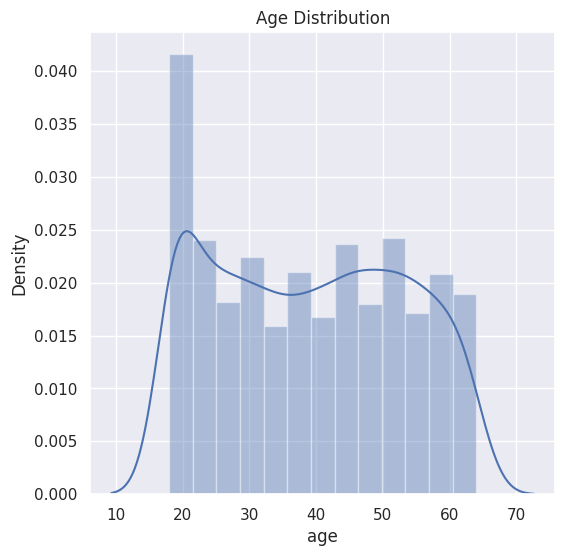

In [48]:
# Analyzing Age Distribution in Insurance Dataset

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(datas['age'])
plt.title('Age Distribution')
plt.show()

In [51]:
datas['age'].value_counts()

,count
age,
18,148
19,142
52,62
23,62
45,62
47,62
28,60
22,60
21,60


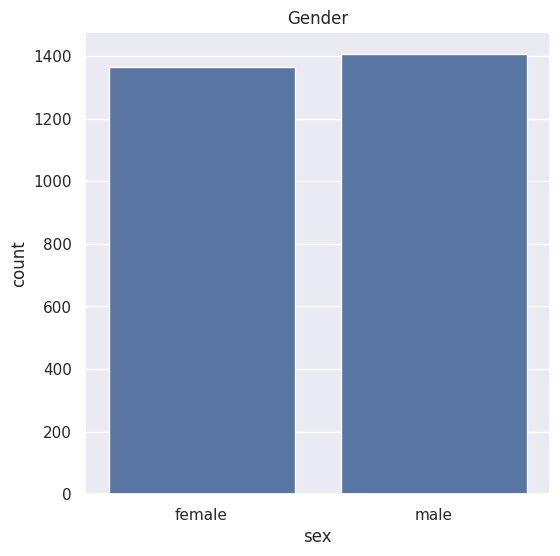

In [49]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=datas)
plt.title('Gender')
plt.show()

In [50]:
datas['sex'].value_counts()

,count
sex,
male,1406
female,1366


<ipython-input-52-d187521ebd5f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas['bmi'])


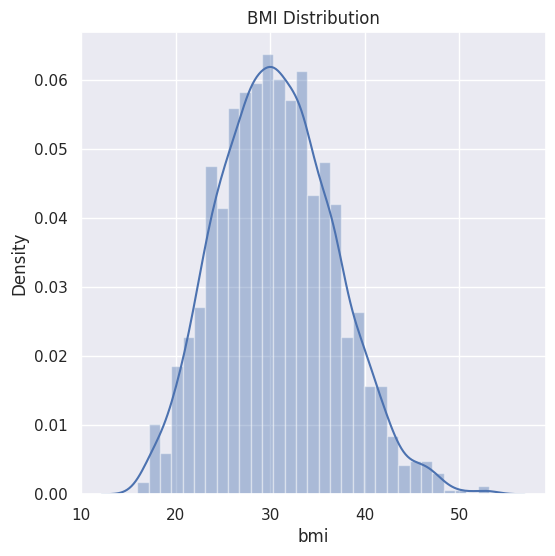

In [52]:
# Analyzing BMI Distribution in the Insurance Dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(datas['bmi'])
plt.title('BMI Distribution')
plt.show()

In [53]:
datas['bmi'].value_counts()

,count
bmi,
32.300,26
28.310,18
30.875,16
34.100,16
30.800,16
...,...
23.300,2
39.710,2
32.870,2


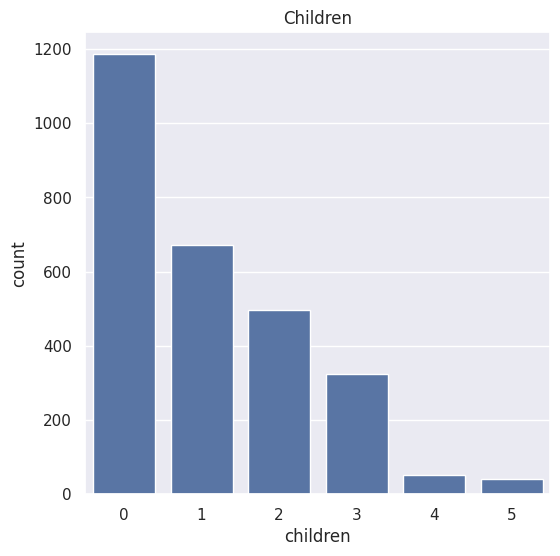

In [54]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=datas)
plt.title('Children')
plt.show()

In [55]:
datas['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


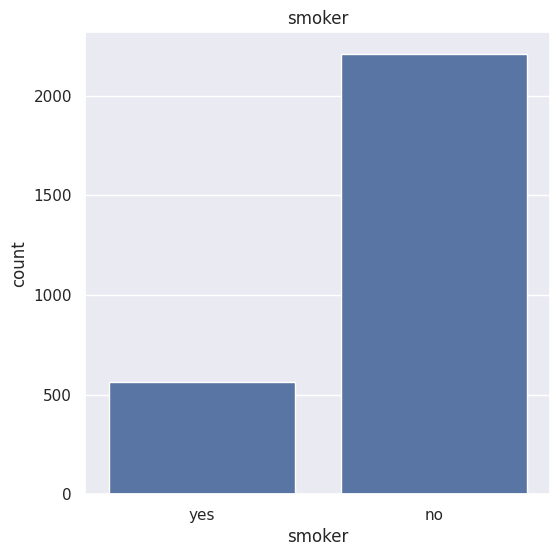

In [56]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=datas)
plt.title('smoker')
plt.show()

In [57]:
datas['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


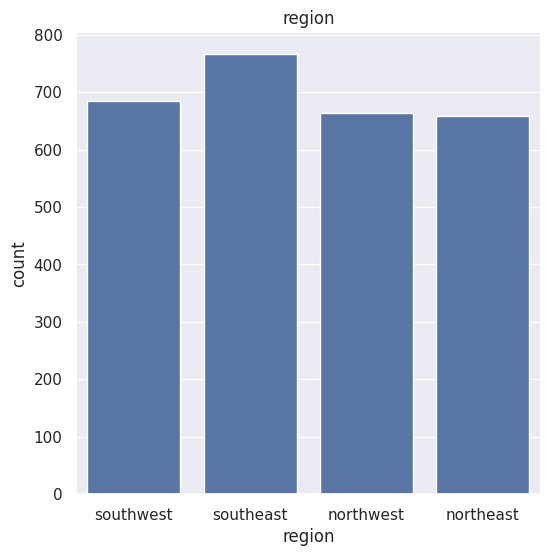

In [58]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=datas)
plt.title('region')
plt.show()

In [59]:
datas['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


<ipython-input-60-f7d7c0097243>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas['charges'])


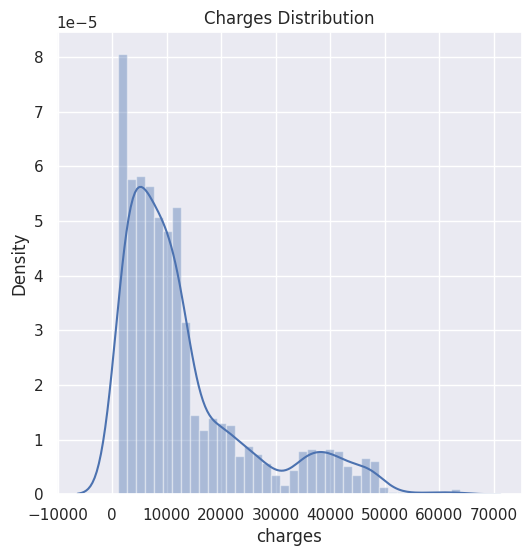

In [60]:
# Analyzing the Distribution of Charges Values in the Insurance Dataset

plt.figure(figsize=(6,6))
sns.distplot(datas['charges'])
plt.title('Charges Distribution')
plt.show()

In [61]:
datas['charges'].value_counts()

,count
charges,
5615.3690,4
9101.7980,4
4673.3922,4
1633.9618,4
3987.9260,4
...,...
1149.3959,2
37079.3720,2
4738.2682,2


# **Data Preprocessing**

Categorical Features are:

**Smoker**<br/>
**Sex**<br/>
**Region**

In [62]:
# Encoding the categorical features

le = LabelEncoder()
datas['sex'] = le.fit_transform(datas['sex'])
datas['smoker'] = le.fit_transform(datas['smoker'])
datas['region'] = le.fit_transform(datas['region'])
datas.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [63]:
# Splitting the Features and Target

x=datas.drop(columns='charges',axis=1)
y=datas['charges']


In [64]:
display(x)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2
2768,21,0,34.600,0,0,3
2769,19,1,26.030,1,1,1
2770,23,1,18.715,0,0,1


In [66]:
display(y)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
2767,8569.86180
2768,2020.17700
2769,16450.89470
2770,21595.38229


In [85]:
# Splitting the data into Training data and Testing Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# **Model Training & Evaluation:**

In [86]:
# loading the Linear Regression model
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [87]:
# prediction on training data
training_data_prediction =model.predict(x_train)
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.748641588527134


In [88]:
# prediction on test data
test_data_prediction =model.predict(x_test)
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7554694115928116


# **Building a Predictive System:**

In [91]:
# Input Data
input_data = (42, 0, 21.34, 1, 0, 3)

# Converting input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making Prediction
prediction = model.predict(input_data_reshaped)
print(prediction)

# Displaying the Prediction
print('The insurance cost is USD', prediction[0])

[5605.96933922]
The insurance cost is USD 5605.969339219388


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
